# ##Project Name - Anti Phishing Prediction

---



---



In [ ]:
# importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


In [ ]:
# upload dataset
from google.colab import files
files.upload()

Saving Phishing_Legitimate_full.csv to Phishing_Legitimate_full.csv


{'Phishing_Legitimate_full.csv': b'id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL\n1,3,1,5,72,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21,44,0,0,0,0,0.0000000000,0.2500000000,1,1,0,0,0,0.0000000000,0,0,0,0,0,0,0,1,1,0,1,1,-1,1,1\n2,3,1,3,144,0,0,0,0,2,0,2,1,0,41,1,0,0,0,0,0,17,16,103,0,

In [ ]:
df = pd.read_csv("Phishing_Legitimate_full.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [ ]:
df.columns

Index(['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperl

In [ ]:
df.shape

(10000, 50)

In [ ]:
df.size

500000

In [ ]:
df.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [ ]:
df.tail()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
9995,9996,3,1,1,50,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,9997,2,1,4,59,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
9999,10000,3,1,2,52,3,0,0,0,0,...,0,0,0,1,1,1,1,1,1,0


In [ ]:
df.isnull()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.sample(10)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
3581,3582,3,1,12,155,1,0,0,0,1,...,1,0,0,1,-1,1,-1,0,1,1
9211,9212,2,1,2,34,0,0,0,0,0,...,1,0,1,1,1,1,1,0,1,0
7536,7537,2,1,5,89,9,0,0,0,0,...,0,0,0,1,-1,-1,1,0,1,0
9946,9947,2,1,2,58,3,0,0,0,0,...,1,0,0,1,0,-1,1,0,1,0
9464,9465,2,1,3,55,0,0,0,0,0,...,0,0,0,1,0,1,1,1,1,0
461,462,3,0,4,47,0,0,0,1,0,...,1,0,0,1,1,-1,1,1,-1,1
8511,8512,1,0,2,39,0,0,0,0,0,...,0,0,0,1,1,1,0,1,1,0
6962,6963,3,0,2,60,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
4986,4987,2,1,3,45,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
2402,2403,2,0,3,50,0,0,0,0,0,...,0,0,0,1,1,1,1,0,-1,1


In [ ]:
df.id.nunique()

10000

In [ ]:
unique=df.nunique().sort_values(ascending=True).reset_index()
unique

,index,0
0,HttpsInHostname,1
1,DoubleSlashInPath,2
2,EmbeddedBrandName,2
3,ExtFavicon,2
4,InsecureForms,2
5,RelativeFormAction,2
6,ExtFormAction,2
7,AbnormalFormAction,2
8,FrequentDomainNameMismatch,2
9,FakeLinkInStatusBar,2


In [ ]:
df.rename(columns={'CLASS_LABEL': 'labels'}, inplace=True)

<Axes: ylabel='Frequency'>

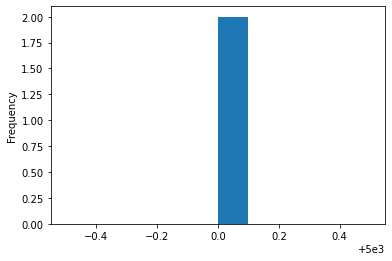

In [ ]:
df['labels'].value_counts().plot(kind='hist')

In [ ]:
### Dropping Index column

df.drop(['id'], axis=1,inplace=True)

In [ ]:
print(df.apply(lambda col: col.unique()))

NumDots                               [3, 2, 1, 8, 5, 4, 6, 12, 7, 14, 13, 15, 10, 1...
SubdomainLevel                               [1, 0, 7, 4, 2, 11, 3, 8, 6, 5, 14, 9, 10]
PathLevel                             [5, 3, 2, 6, 4, 1, 10, 7, 9, 8, 0, 11, 13, 14,...
UrlLength                             [72, 144, 58, 79, 46, 42, 60, 30, 76, 64, 47, ...
NumDash                               [0, 1, 2, 3, 11, 4, 5, 7, 6, 13, 8, 20, 15, 9,...
NumDashInHostname                                        [0, 1, 2, 4, 3, 5, 7, 6, 9, 8]
AtSymbol                                                                         [0, 1]
TildeSymbol                                                                      [0, 1]
NumUnderscore                         [0, 2, 7, 3, 1, 8, 5, 4, 6, 12, 9, 11, 10, 14,...
NumPercent                              [0, 4, 1, 2, 3, 5, 6, 8, 15, 7, 13, 16, 11, 19]
NumQueryComponents                    [0, 2, 5, 1, 10, 3, 9, 4, 6, 13, 7, 16, 19, 17...
NumAmpersand                    

In [ ]:
X=df.drop(['labels'], axis=1) ### Dependent Variables
y=df['labels']  ### Independent Variables

In [ ]:
### Import Train and split method from model selection; do 70 & 30 % split up
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=4)

In [ ]:
#### Use LR to train the model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=100)
lr.fit(X_train,y_train).score(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9335714285714286

In [ ]:
test_data_prediction=lr.predict(X_test)
lr.score(X_test,y_test)

0.929

Text(0.5, 257.44, 'Predicted')

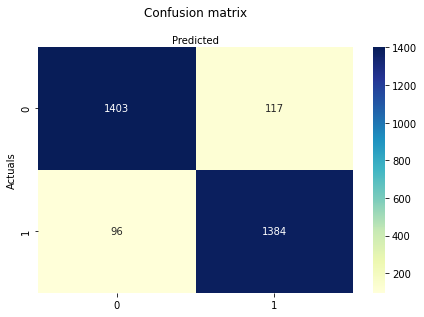

In [ ]:
### Predction data is ready lets compare with actual results and see how accqurate the results are predicated.

### Lets use confuction matrix to compare the result.

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
confusion_matrix = confusion_matrix(y_test,test_data_prediction)
confusion_matrix

class_names = [0,1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actuals')
plt.xlabel('Predicted')

In [ ]:
y_test.count()

3000

By looking at the confusion matrix. There are 142 records that are predicted as "False Positive" as well as 98 records predicted as "False Negative". False predictions are very less percentage compare to success values, so out of 3317 records; only 240 records are predicted wrongly

In [ ]:
from sklearn import metrics
print('Model Metrics')
print('--------------')
print('Accuracy :- ',metrics.accuracy_score(y_test,test_data_prediction))
print('Precision :- ',metrics.precision_score(y_test,test_data_prediction))
print('Recall :-',metrics.recall_score(y_test,test_data_prediction))

Model Metrics
--------------
Accuracy :-  0.929
Precision :-  0.9220519653564291
Recall :- 0.9351351351351351
